In [1]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *
from venn import venn

HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol, allen_mouse_genes = LoadGeneINFO()
ExpMat, ExpZscoreMat, ExpMatNorm, ExpZscoreMatNorm = LoadExpressionMatrices()
gnomad_cons = pd.read_csv("/Users/jiayao/Work/Resources/gnomad.v2.1.1.lof_metrics.by_gene.txt",
                          delimiter="\t", index_col="gene")

/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (38,48) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [30]:
gnomad_cons.columns.values

array(['transcript', 'obs_mis', 'exp_mis', 'oe_mis', 'mu_mis',
       'possible_mis', 'obs_mis_pphen', 'exp_mis_pphen', 'oe_mis_pphen',
       'possible_mis_pphen', 'obs_syn', 'exp_syn', 'oe_syn', 'mu_syn',
       'possible_syn', 'obs_lof', 'mu_lof', 'possible_lof', 'exp_lof',
       'pLI', 'pNull', 'pRec', 'oe_lof', 'oe_syn_lower', 'oe_syn_upper',
       'oe_mis_lower', 'oe_mis_upper', 'oe_lof_lower', 'oe_lof_upper',
       'constraint_flag', 'syn_z', 'mis_z', 'lof_z', 'oe_lof_upper_rank',
       'oe_lof_upper_bin', 'oe_lof_upper_bin_6', 'n_sites', 'classic_caf',
       'max_af', 'no_lofs', 'obs_het_lof', 'obs_hom_lof', 'defined', 'p',
       'exp_hom_lof', 'classic_caf_afr', 'classic_caf_amr',
       'classic_caf_asj', 'classic_caf_eas', 'classic_caf_fin',
       'classic_caf_nfe', 'classic_caf_oth', 'classic_caf_sas', 'p_afr',
       'p_amr', 'p_asj', 'p_eas', 'p_fin', 'p_nfe', 'p_oth', 'p_sas',
       'transcript_type', 'gene_id', 'transcript_level', 'cds_length',
       'num_codin

In [2]:
asc_df = pd.read_csv("../dat/genes/asd/asc_tada_RR.csv")
spark_df = pd.read_csv("../dat/genes/asd/spark_tada_RR.csv")
asc_match_df = pd.read_csv("dat/matching/asd_asc_exp_matches_1000.csv", index_col="GENE")

asc_sig = asc_df[asc_df["qval_dnccPTV"]<0.1]
spark_sig = spark_df[spark_df["Qvalue"]<0.2]

In [4]:
asc_genes = set(asc_sig["entrez_id"].values)
spark_genes = set(spark_sig["Entrez"].values)

common_genes = asc_genes.intersection(spark_genes)
asc_only_genes = asc_genes.difference(spark_genes)
spark_only_genes = spark_genes.difference(asc_genes)

In [10]:
asc_only_gene2MutN = ASC_Gene_Weights(asc_sig[asc_sig["entrez_id"].isin(asc_only_genes)], FDR=0.1)
spark_only_gene2MutN = SPARK_Gene_Weights(spark_sig[spark_sig["Entrez"].isin(spark_only_genes)], FDR=0.2)
asc_common_gene2MutN = ASC_Gene_Weights(asc_sig[asc_sig["entrez_id"].isin(common_genes)], FDR=0.1)
spark_common_gene2MutN = SPARK_Gene_Weights(spark_sig[spark_sig["Entrez"].isin(common_genes)], FDR=0.2)

In [11]:
asc_only__avgZ_Mutcount = AvgSTRZ_Weighted(ExpZscoreMat, asc_only_gene2MutN,
                                              csv_fil = "dat/bias/spark.avgZ.asc_only.csv")
spark_only_avgZ_Mutcount = AvgSTRZ_Weighted(ExpZscoreMat, spark_only_gene2MutN,
                                              csv_fil = "dat/bias/spark.avgZ.spark_only.csv")
asc_common_avgZ_Mutcount = AvgSTRZ_Weighted(ExpZscoreMat, asc_common_gene2MutN,
                                              csv_fil = "dat/bias/spark.avgZ.asc_common.csv")
spark_common_avgZ_Mutcount = AvgSTRZ_Weighted(ExpZscoreMat, spark_common_gene2MutN,
                                              csv_fil = "dat/bias/spark.avgZ.spark_common.csv")

27
38
45
42


In [ ]:
asc_only_expl_Mutcount = ExpAVGWithExpMatch(ExpMat, asc_only_gene2MutN, 
                                              csv_fil = "dat/bias/spark.expL.asc_only.csv")
spark_only_expl_Mutcount = ExpAVGWithExpMatch(ExpMat, spark_only_gene2MutN,
                                              csv_fil = "dat/bias/spark.expL.spark_only.csv")
asc_common_expl_Mutcount = ExpAVGWithExpMatch(ExpMat, asc_common_gene2MutN,
                                              csv_fil = "dat/bias/spark.expL.asc_common.csv")
spark_common_expl_Mutcount = ExpAVGWithExpMatch(ExpMat, spark_common_gene2MutN,
                                              csv_fil = "dat/bias/spark.expL.spark_common.csv")

In [ ]:
asc_pli1_gene2MutN = ASC_Gene_Weights(asc_sig[asc_sig["HGNC"].isin(pli_genes)], FDR=0.2)
asc_constraint_avgZ_Mutcount = AvgSTRZ_Weighted(ExpZscoreMat, spark_pli1_gene2MutN,
                                              csv_fil = "dat/bias/spark.avgZ.spark_constraint.csv")
asc_pli2_gene2MutN = SPARK_Gene_Weights(spark_sig[spark_sig["HGNC"].isin(pli_low_genes)], FDR=0.2)
asc_unconstraint_avgZ_Mutcount = AvgSTRZ_Weighted(ExpZscoreMat, spark_pli2_gene2MutN,
                                              csv_fil = "dat/bias/spark.avgZ.spark_unconstraint.csv")

In [52]:
#PLI1_genes = [Symb for x in gnomad_cons[gnomad_cons[}pLI]>0.95].index.values]
pli_genes = gnomad_cons[gnomad_cons["pLI"]>0.95].index.values
pli_low_genes = gnomad_cons[gnomad_cons["pLI"]<0.95].index.values
spark_pli1_gene2MutN = SPARK_Gene_Weights(spark_sig[spark_sig["HGNC"].isin(pli_genes)], FDR=0.2)
spark_constraint_avgZ_Mutcount = AvgSTRZ_Weighted(ExpZscoreMat, spark_pli1_gene2MutN,
                                              csv_fil = "dat/bias/spark.avgZ.spark_constraint.csv")
spark_pli2_gene2MutN = SPARK_Gene_Weights(spark_sig[spark_sig["HGNC"].isin(pli_low_genes)], FDR=0.2)
spark_unconstraint_avgZ_Mutcount = AvgSTRZ_Weighted(ExpZscoreMat, spark_pli2_gene2MutN,
                                              csv_fil = "dat/bias/spark.avgZ.spark_unconstraint.csv")

35
44


In [53]:
asc_common_TR = spark_constraint_avgZ_Mutcount.loc[Selected_Thalamic_STRs, "Rank"]
print("asc_common_TR\n", asc_common_TR)
asc_common_TR = spark_unconstraint_avgZ_Mutcount.loc[Selected_Thalamic_STRs, "Rank"]
print("asc_common_TR\n", asc_common_TR)

asc_common_TR
 Lateral_posterior_nucleus_of_the_thalamus    10
Parafascicular_nucleus                       24
Mediodorsal_nucleus_of_thalamus              60
Rhomboid_nucleus                             86
Nucleus_of_reuniens                          72
Name: Rank, dtype: int64
asc_common_TR
 Lateral_posterior_nucleus_of_the_thalamus    147
Parafascicular_nucleus                       114
Mediodorsal_nucleus_of_thalamus              139
Rhomboid_nucleus                             117
Nucleus_of_reuniens                          106
Name: Rank, dtype: int64


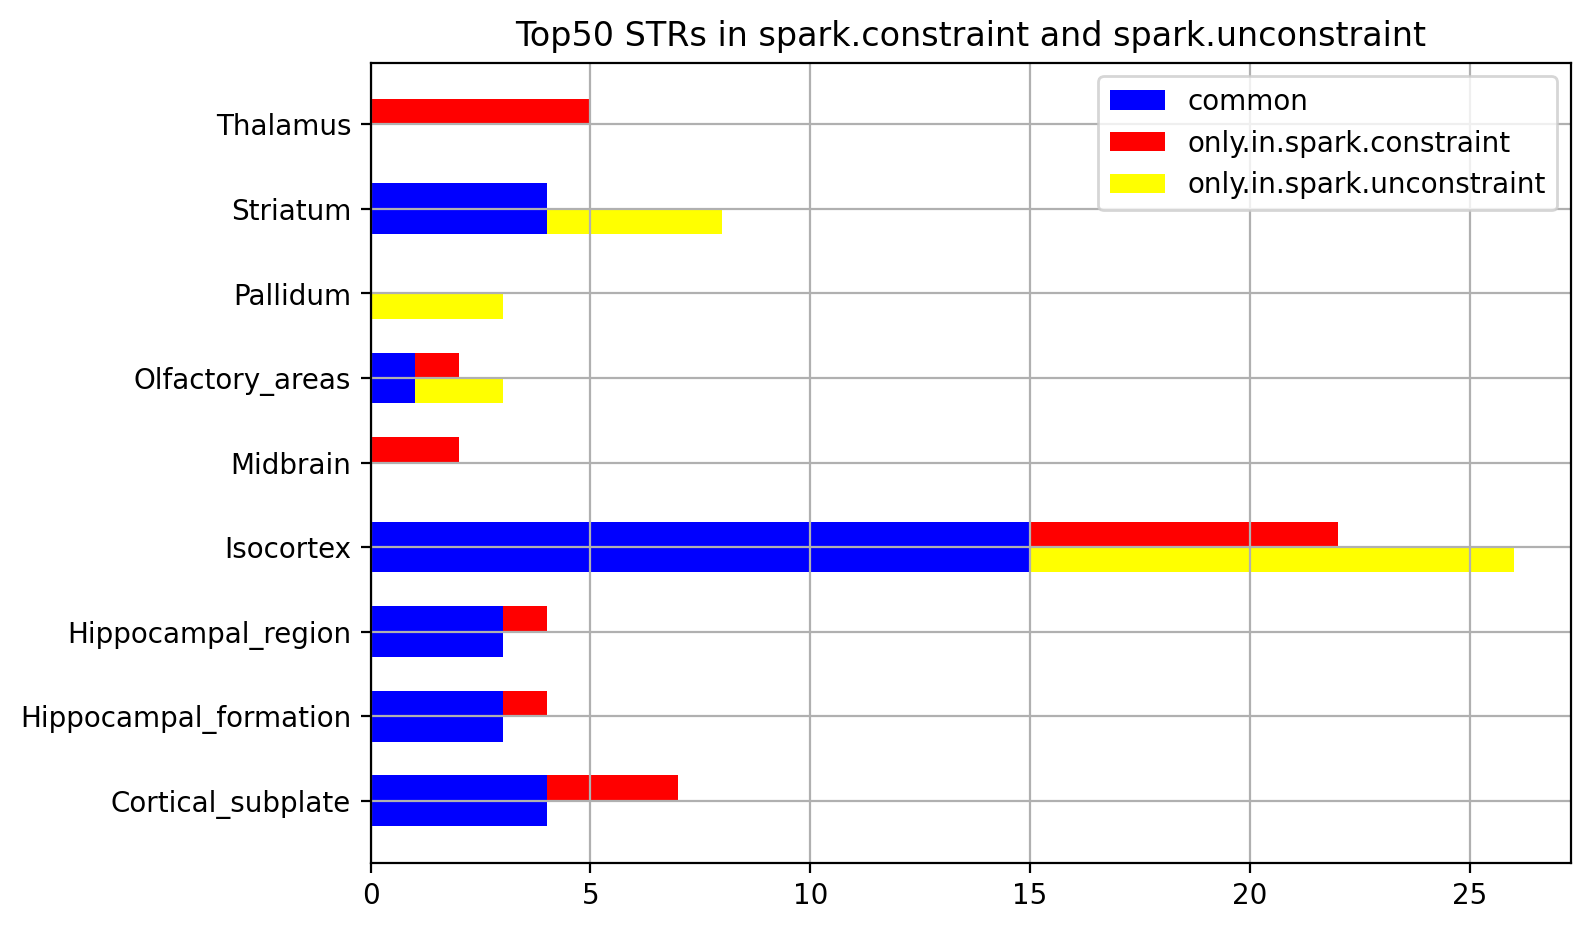

In [54]:
Common_compare = CompareSTROverlap(spark_constraint_avgZ_Mutcount, spark_unconstraint_avgZ_Mutcount, 
                                   "spark.constraint", "spark.unconstraint")

In [24]:
Selected_Thalamic_STRs = ["Lateral_posterior_nucleus_of_the_thalamus", "Parafascicular_nucleus",
                          "Mediodorsal_nucleus_of_thalamus", "Rhomboid_nucleus", "Nucleus_of_reuniens"]
asc_common_TR = asc_common_avgZ_Mutcount.loc[Selected_Thalamic_STRs, "Rank"]
print("asc_common_TR\n", asc_common_TR)

asc_common_TR
 Lateral_posterior_nucleus_of_the_thalamus     6
Parafascicular_nucleus                        8
Mediodorsal_nucleus_of_thalamus              16
Rhomboid_nucleus                             24
Nucleus_of_reuniens                          33
Name: Rank, dtype: int64


In [27]:
spark_common_TR = spark_common_avgZ_Mutcount.loc[Selected_Thalamic_STRs, "Rank"]
print("asc_common_TR\n", spark_common_TR)

asc_common_TR
 Lateral_posterior_nucleus_of_the_thalamus    16
Parafascicular_nucleus                        9
Mediodorsal_nucleus_of_thalamus              22
Rhomboid_nucleus                             23
Nucleus_of_reuniens                          41
Name: Rank, dtype: int64


In [28]:
spark_only_TR = spark_only_avgZ_Mutcount.loc[Selected_Thalamic_STRs, "Rank"]
print(spark_only_TR)

Lateral_posterior_nucleus_of_the_thalamus    102
Parafascicular_nucleus                       114
Mediodorsal_nucleus_of_thalamus              175
Rhomboid_nucleus                             201
Nucleus_of_reuniens                          116
Name: Rank, dtype: int64


In [29]:
asc_only_TR = asc_only__avgZ_Mutcount.loc[Selected_Thalamic_STRs, "Rank"]
print(asc_only_TR)

Lateral_posterior_nucleus_of_the_thalamus     10
Parafascicular_nucleus                        58
Mediodorsal_nucleus_of_thalamus               48
Rhomboid_nucleus                             128
Nucleus_of_reuniens                           86
Name: Rank, dtype: int64


(array([0.83333334, 0.27777778, 0.41666667, 0.13888889, 0.        ,
        0.        , 0.        , 0.41666667, 0.41666667, 7.50000003]),
 array([3.72960000e-09, 1.00000003e-01, 2.00000003e-01, 3.00000003e-01,
        4.00000002e-01, 5.00000002e-01, 6.00000001e-01, 7.00000001e-01,
        8.00000001e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

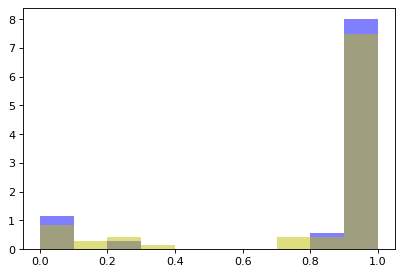

In [45]:
plt.hist(gnomad_cons.loc[spark_sig[spark_sig["Entrez"].isin(common_genes)]["HGNC"], "pLI"], alpha=0.5, color='blue', density=1)
plt.hist(gnomad_cons.loc[spark_sig[spark_sig["Entrez"].isin(spark_only_genes)]["HGNC"], "pLI"], alpha=0.5, color='y', density=1)

In [31]:
asc_sig.head(2)

,gene,hugoGene,hgnc_id,entrez_id,ensembl_gene_id,refseq_accession,uniprot_ids,location,chr,start_hg38,...,ASC65_2015,ASC102_2018,ASD:DDID,ASD_vs_DDID,ASD53,DDID49,Function,LGD_RR,misa_RR,misb_RR
0,CHD8,CHD8,HGNC:20153,57680,ENSG00000100888,NM_020920,Q9HCK8,14q11.2,chr14,21385194,...,1,1,3.07850705163288,ASD,1,0,Gene expression regulation,60.711380,12.347005,15.270008
1,SCN2A,SCN2A,HGNC:10588,6326,ENSG00000136531,NM_021007,Q99250,2q24.3,chr2,165194993,...,1,1,0.6913147929608191,DDID,0,1,Neuronal communication,80.483746,6.916012,36.717196


In [18]:
asc_common_avgZ_Mutcount.head()

,STR,EFFECT,REGION,Rank,InCircuit,TrimRank
Dentate_gyrus,Dentate_gyrus,1.138423,Hippocampal_region,1,1,1
Lateral_amygdalar_nucleus,Lateral_amygdalar_nucleus,1.027897,Cortical_subplate,2,0,47
Field_CA1,Field_CA1,1.018443,Hippocampal_region,3,1,4
Field_CA2,Field_CA2,0.983599,Hippocampal_region,4,1,2
Field_CA3,Field_CA3,0.964202,Hippocampal_region,5,1,3


In [17]:
asc_common_avgZ_Mutcount_RD = RegionDistributions(asc_common_avgZ_Mutcount.set_index("STR"), show=True)

Striatum 	 5 	 Nucleus_accumbens; Caudoputamen; Lateral_septal_nucleus_caudal_caudodorsal_part; Lateral_septal_nucleus_ventral_part; Intercalated_amygdalar_nucleus
Pallidum 	 2 	 Substantia_innominata; Bed_nuclei_of_the_stria_terminalis
Thalamus 	 14 	 Lateral_posterior_nucleus_of_the_thalamus; Parafascicular_nucleus; Mediodorsal_nucleus_of_thalamus; Central_lateral_nucleus_of_the_thalamus; Lateral_dorsal_nucleus_of_thalamus; Rhomboid_nucleus; Posterior_complex_of_the_thalamus; Submedial_nucleus_of_the_thalamus; Nucleus_of_reuniens; Paraventricular_nucleus_of_the_thalamus; Central_medial_nucleus_of_the_thalamus; Anteromedial_nucleus_dorsal_part; Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part; Ventral_medial_nucleus_of_the_thalamus
Isocortex 	 12 	 Prelimbic_area; Primary_somatosensory_area_lower_limb; Infralimbic_area; Primary_motor_area; Anteromedial_visual_area; Orbital_area_lateral_part; Primary_visual_area; Secondary_motor_area; Posterior_parietal_association_area

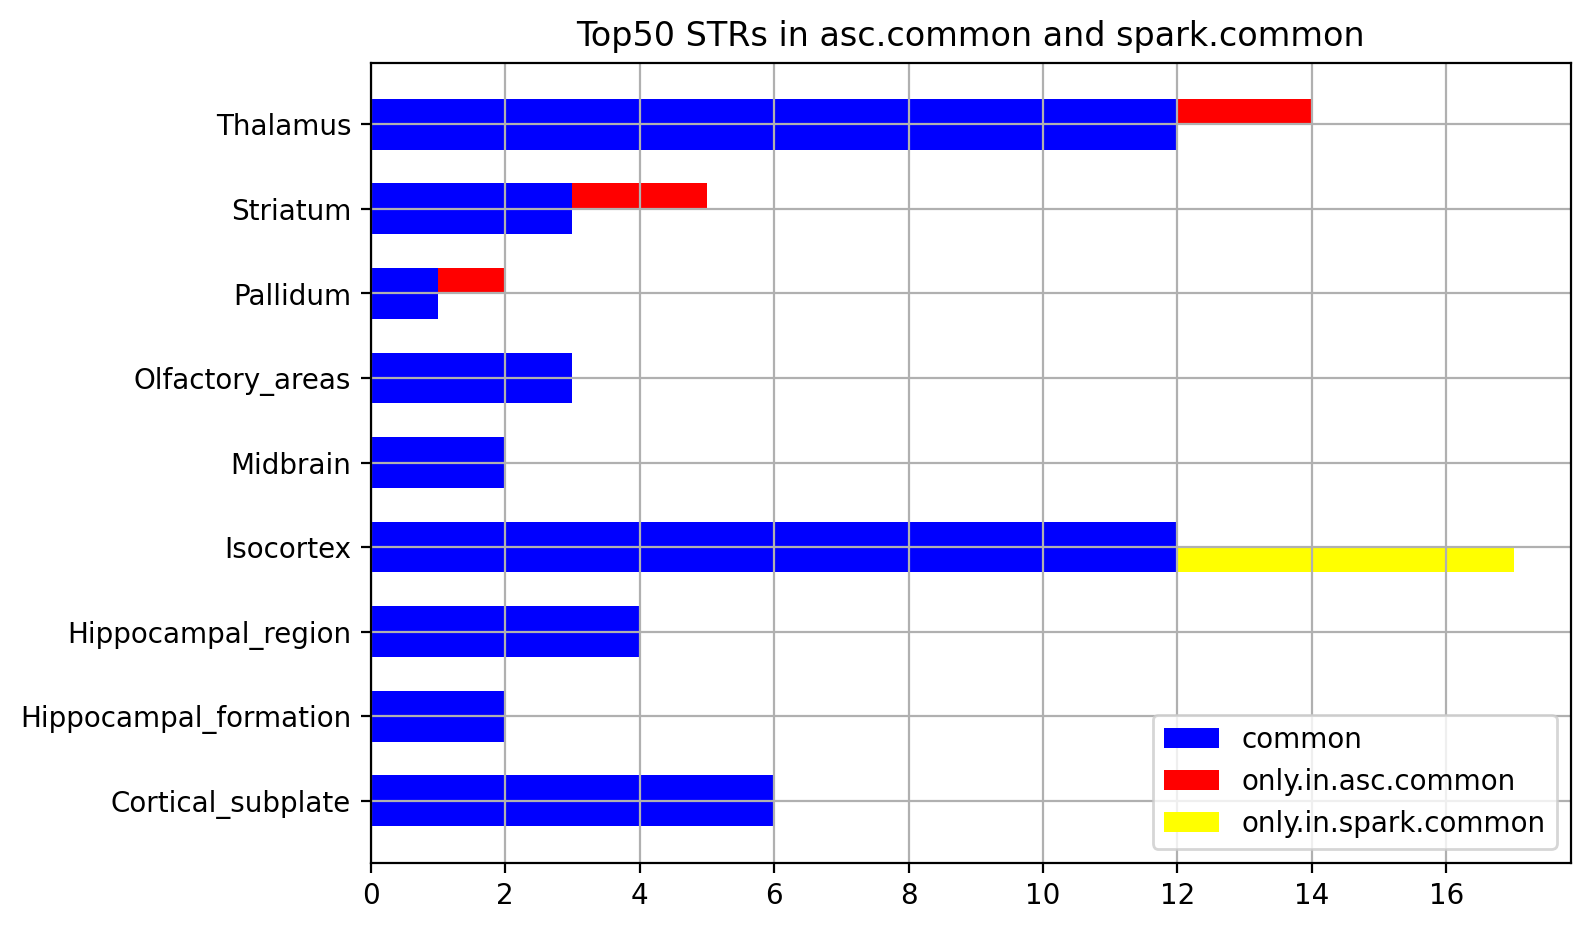

In [12]:
Common_compare = CompareSTROverlap(asc_common_avgZ_Mutcount, spark_common_avgZ_Mutcount, 
                                   "asc.common", "spark.common")

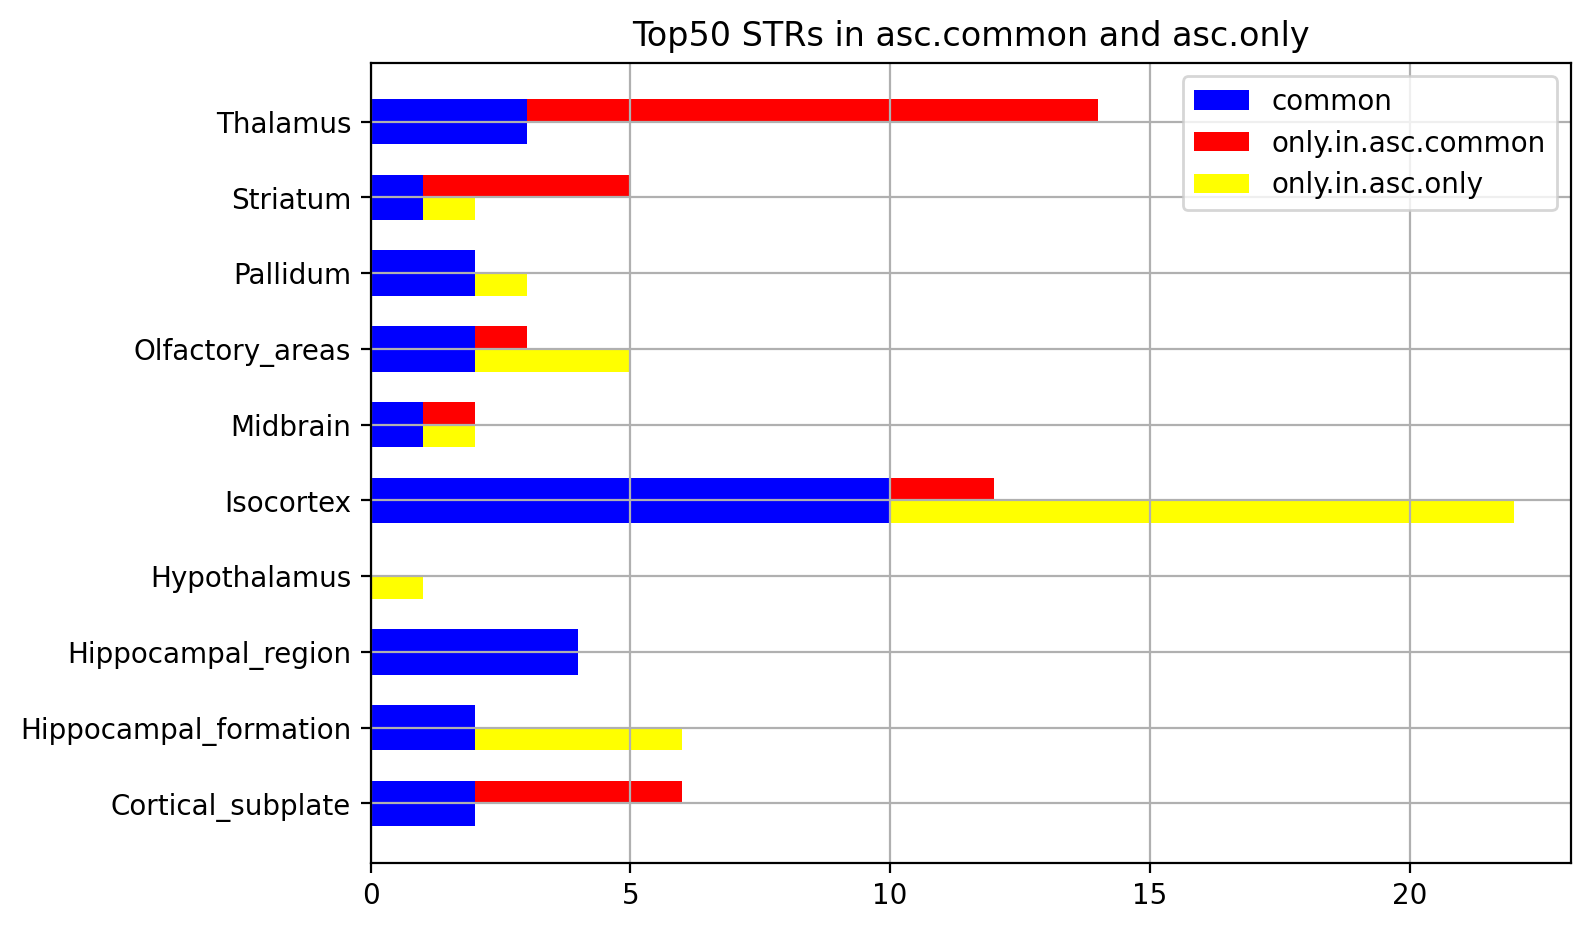

In [13]:
Common_compare = CompareSTROverlap(asc_common_avgZ_Mutcount, asc_only__avgZ_Mutcount, 
                                   "asc.common", "asc.only")

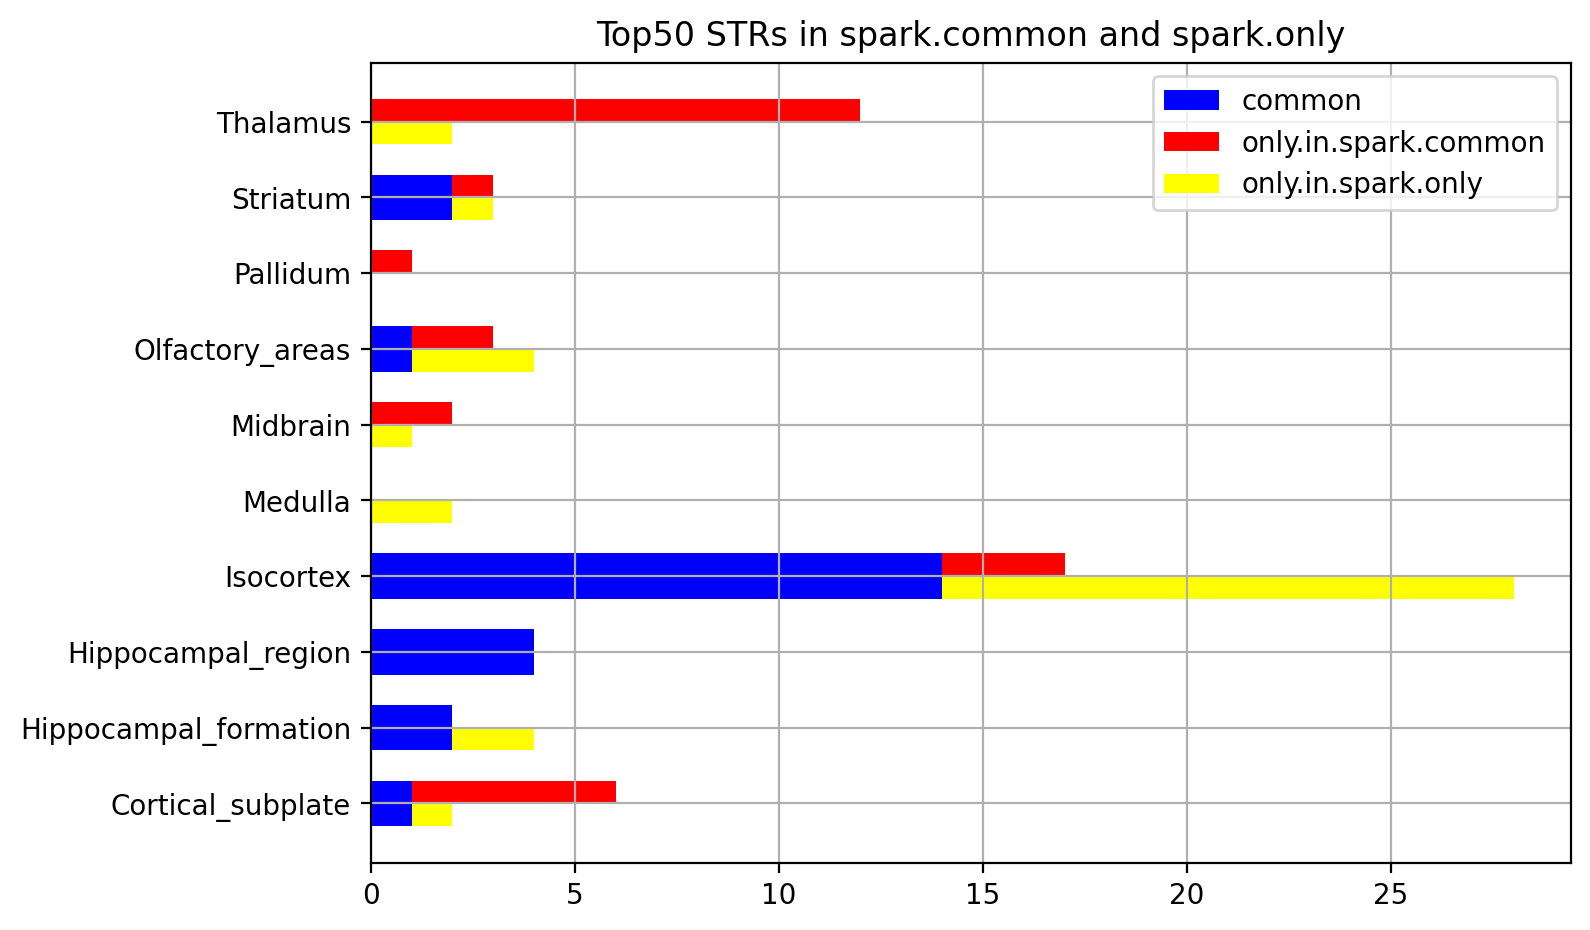

In [14]:
Common_compare = CompareSTROverlap(spark_common_avgZ_Mutcount, spark_only_avgZ_Mutcount, 
                                   "spark.common", "spark.only")

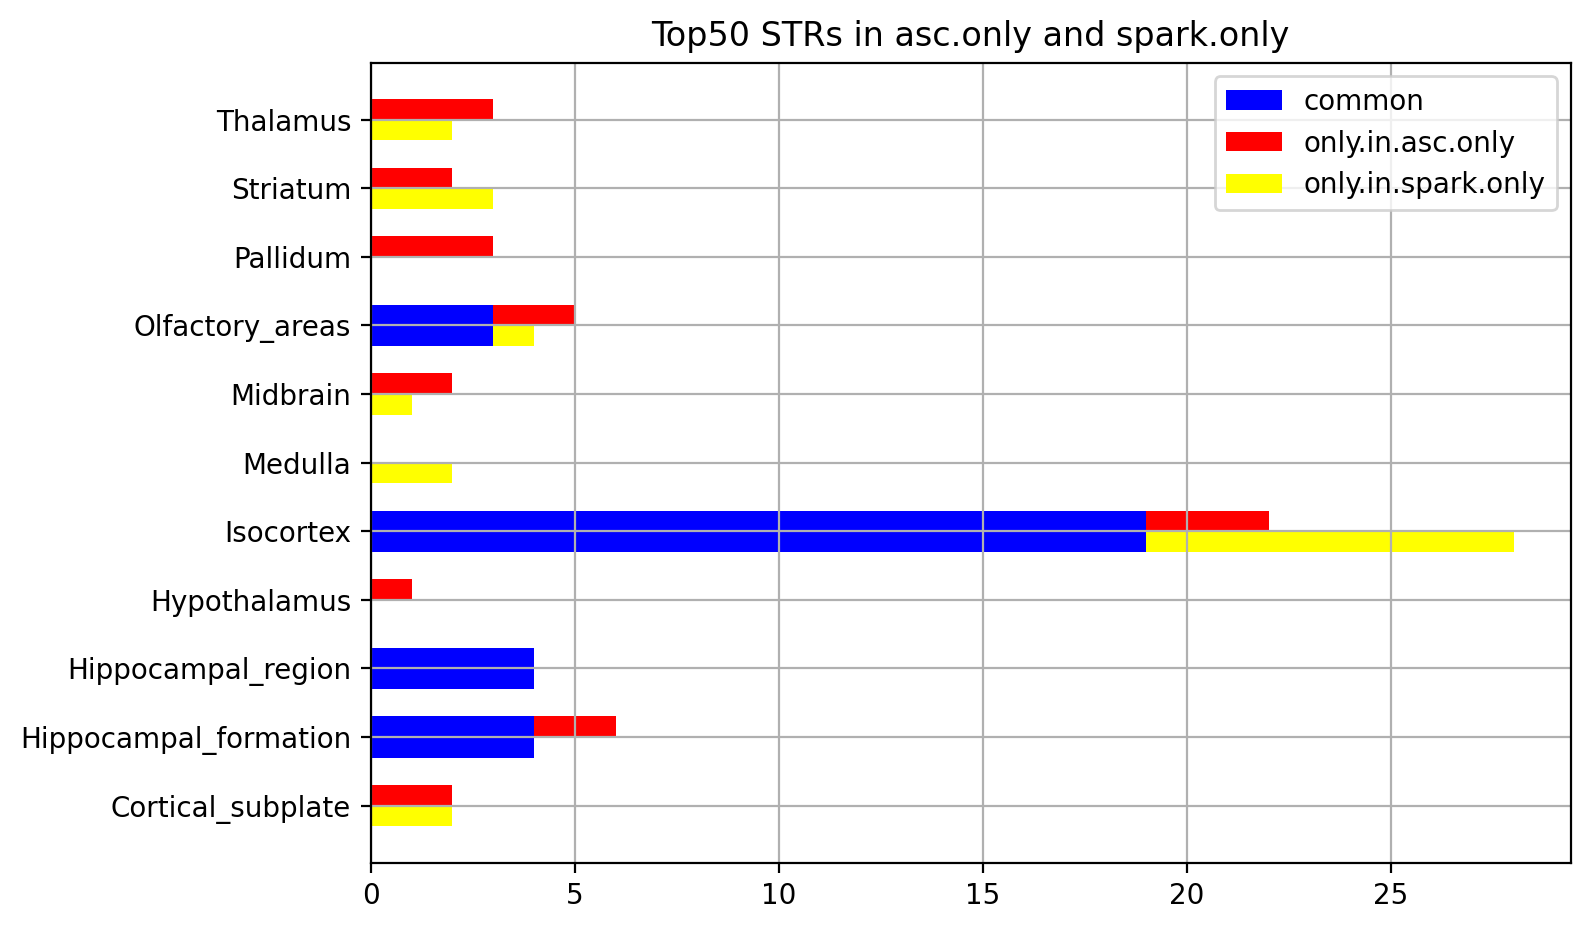

In [15]:
Common_compare = CompareSTROverlap(asc_only__avgZ_Mutcount, spark_only_avgZ_Mutcount, 
                                   "asc.only", "spark.only")